**Import Libraries**

In [ ]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

**Load Cifar-10 Dataset**

In [ ]:
# Load CIFAR-10 Train and Test Datasets
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train_full,
                                                  y_train_full,
                                                  test_size=0.1,
                                                  random_state=42,
                                                  stratify=y_train_full)

print(f"X train shape: {X_train.shape}")
print(f"y train shape: {y_train.shape}")
print(f"X val shape: {X_val.shape}")
print(f"y val shape: {y_val.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y test shape: {y_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
X train shape: (45000, 32, 32, 3)
y train shape: (45000, 1)
X val shape: (5000, 32, 32, 3)
y val shape: (5000, 1)
X test shape: (10000, 32, 32, 3)
y test shape: (10000, 1)


In [ ]:
# Define the class labels
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

**Example Images from each Class**

/tmp/ipykernel_30/2823670851.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(y_train[index])


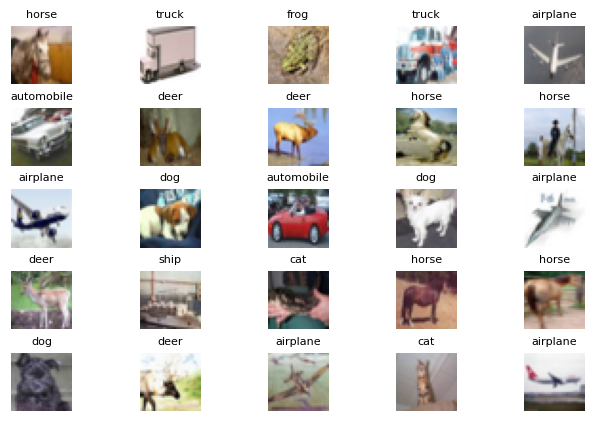

In [ ]:
# Sample images from CIFAR-10 dataset
W, L = 5, 5

fig, axes = plt.subplots(L, W, figsize = (8, 5))
axes = axes.ravel()

n_train = len(X_train)
for i in np.arange(0, W * L):
    index = np.random.randint(0, n_train)
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

**Class Distribution**

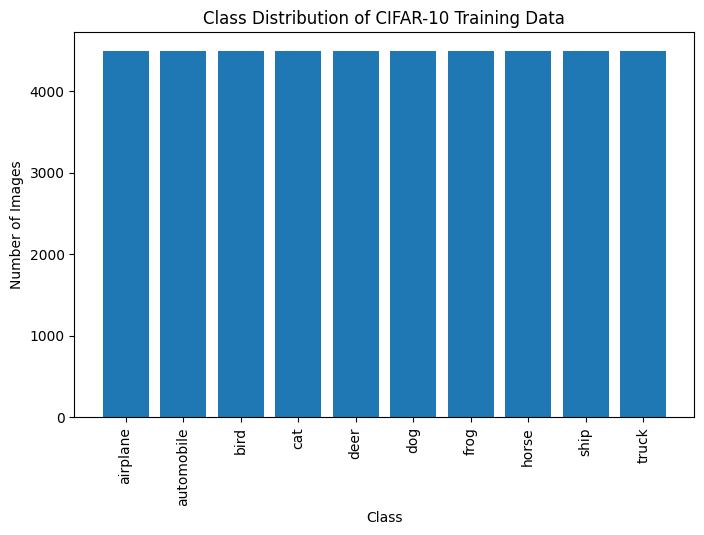

In [ ]:
# Plot Training Data Class Distribution
classes, label_counts = np.unique(y_train, return_counts=True)

plt.figure(figsize=(8, 5))
plt.bar(labels, label_counts)
plt.title("Class Distribution of CIFAR-10 Training Data")
plt.xticks(rotation=90)
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

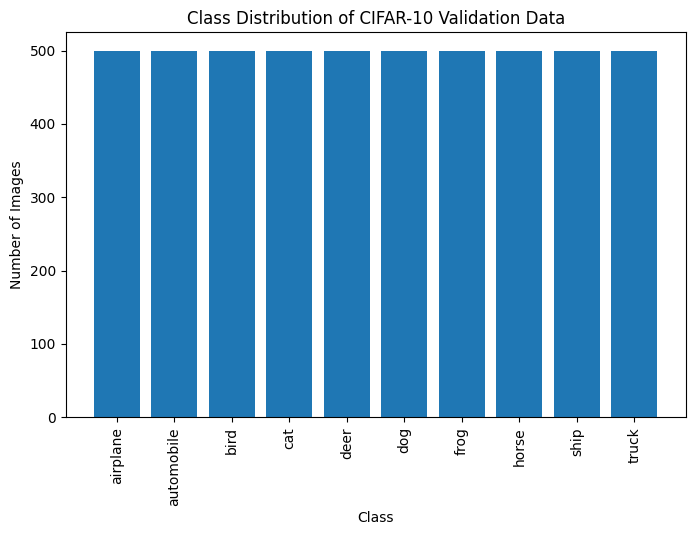

In [ ]:
# Plot Validation Data Class Distribution
classes, label_counts = np.unique(y_val, return_counts=True)

plt.figure(figsize=(8, 5))
plt.bar(labels, label_counts)
plt.title("Class Distribution of CIFAR-10 Validation Data")
plt.xticks(rotation=90)
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

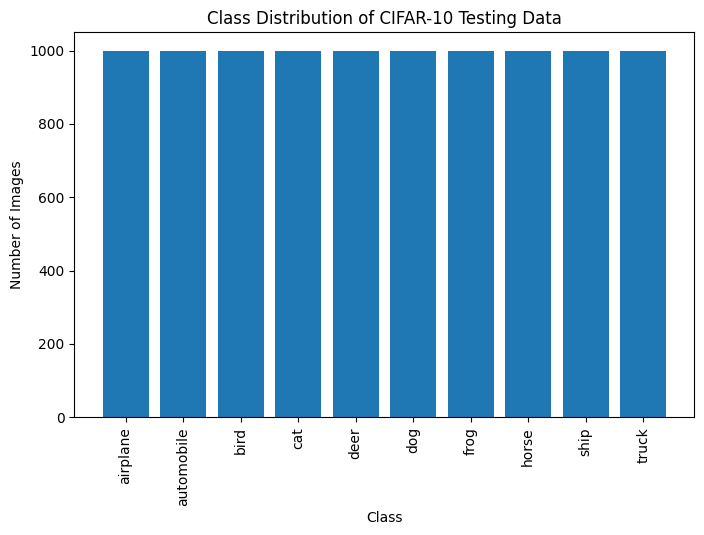

In [ ]:
# Plot Testing Data Class Distribution
classes, label_counts = np.unique(y_test, return_counts=True)

plt.figure(figsize=(8, 5))
plt.bar(labels, label_counts)
plt.title("Class Distribution of CIFAR-10 Testing Data")
plt.xticks(rotation=90)
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

**Data Normalization**

In [ ]:
# Scale and flatten the images
from sklearn.utils.validation import column_or_1d

# Normalize the pixel values to the range [0,1]
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Flatten the images into 2D arrays
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# 1D array format for labels
y_train_1d = column_or_1d(y_train)
y_test_1d = column_or_1d(y_test)

**Pixel Intensity Distribution**

*   Pixel intensity refers to the brightness or color of individual pixels in an image, typically ranging from 0 (black) to 255 (white) for each color channel (red, green, blue in RGB).
*   Higher pixel intensities generally indicate lighter colors (closer to white), while lower intensities represent darker colors (closer to black).
*   Analyzing the average pixel intensity across images in a class helps you understand the dominant color or brightness in the images of that class. For instance, images of airplanes may have different lighting patterns compared to cats or dogs.



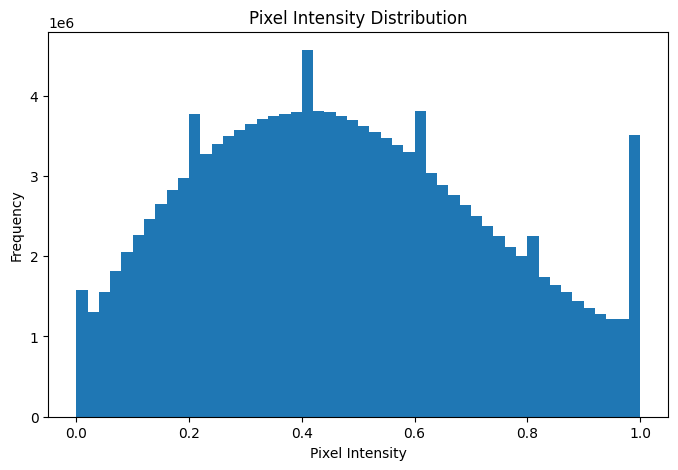

In [ ]:
pixels = X_train.flatten()

plt.figure(figsize=(8, 5))
plt.hist(pixels, bins=50)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

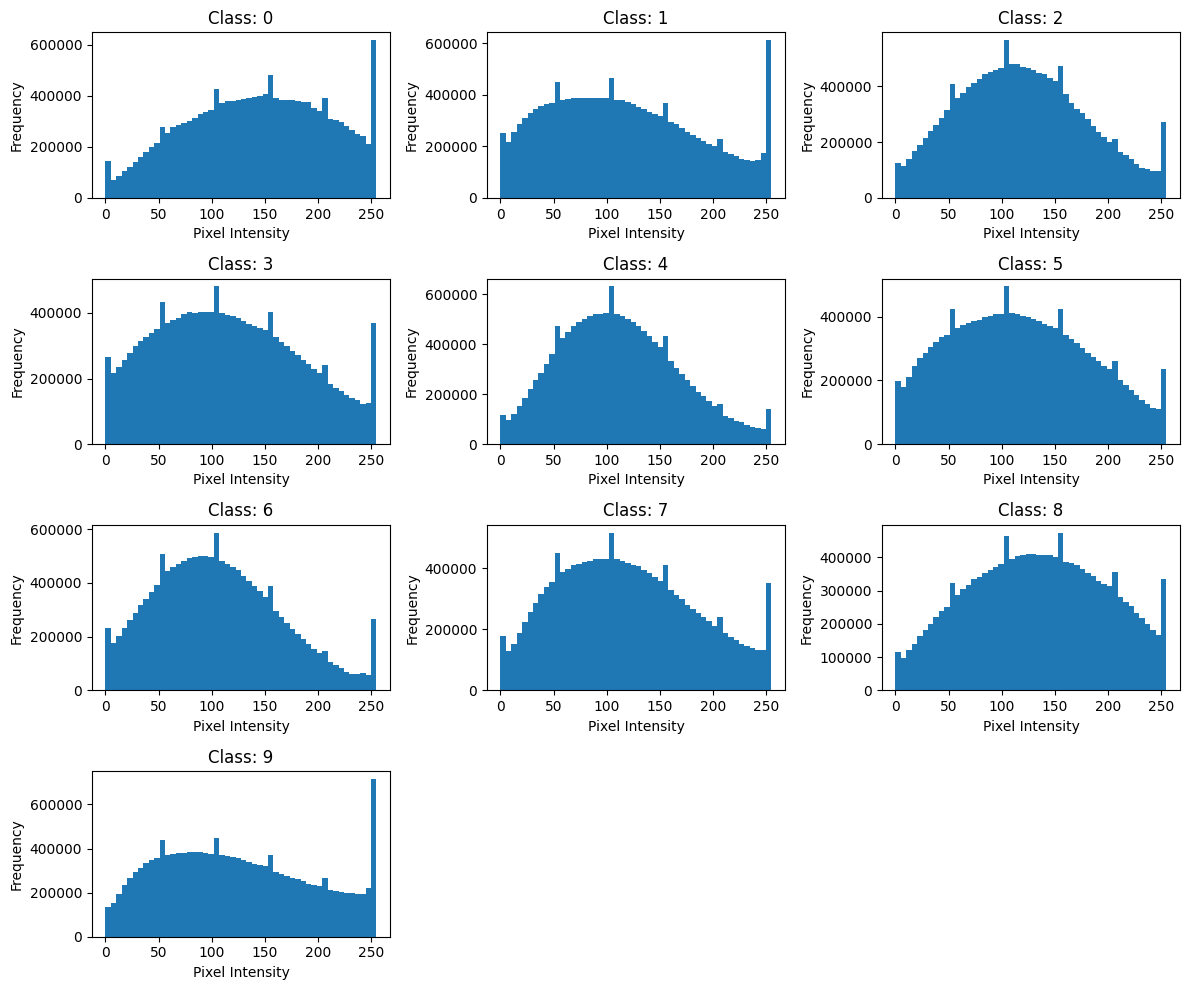

In [ ]:
plt.figure(figsize=(12, 10))
y_train_plot = y_train_full.flatten()

for label in range(10):
    #Get the  data for the current class
    class_data = X_train_full[y_train_plot == label]

    # Need to flatten the image data
    pixels = class_data.flatten()

    # Plot the distribution for the current class
    plt.subplot(4, 3, label + 1)
    plt.hist(pixels, bins=50)
    plt.title(f"Class: {classes[label]}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

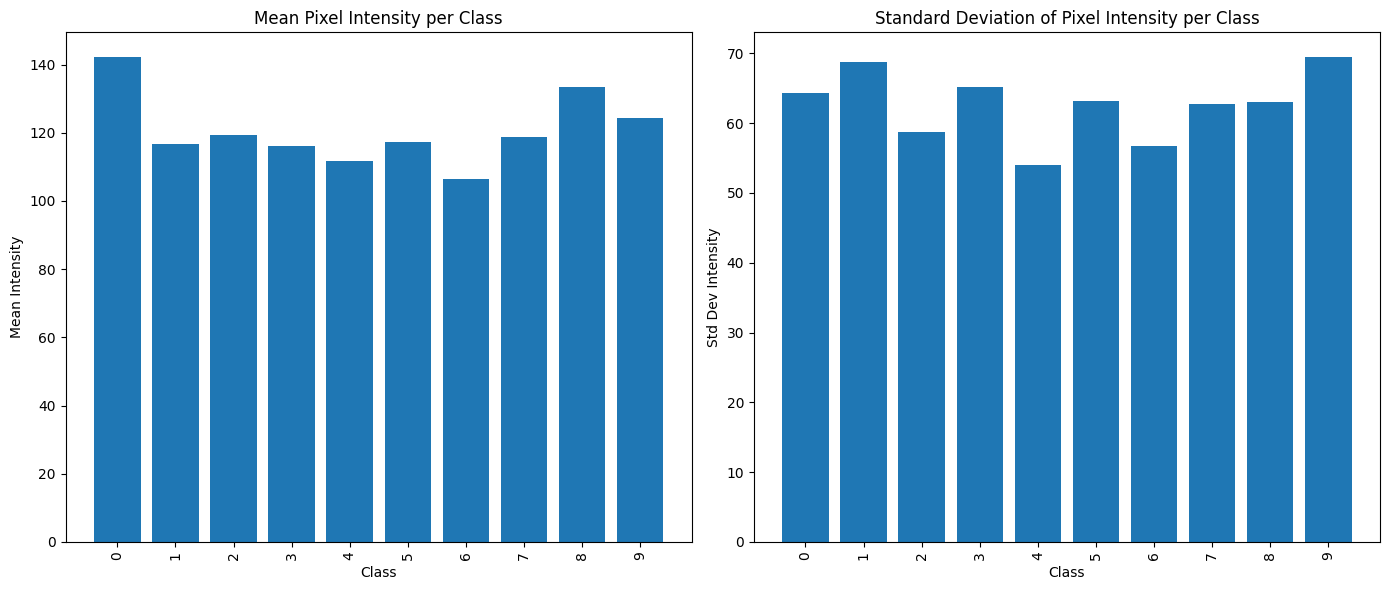

In [ ]:
# Calculate mean and std deviation for each class
means = []
stds = []
variances = []
for label in range(10):
    class_data = X_train_full[y_train_plot == label]
    means.append(np.mean(class_data, axis=(0, 1, 2)))
    stds.append(np.std(class_data, axis=(0, 1, 2)))
    variances.append(np.var(class_data, axis=(0, 1, 2)))

# Convert to proper format in a numpy array
means = np.array(means)
stds = np.array(stds)
variances = np.array(variances)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Mean Plot
axes[0].bar(range(10), np.mean(means, axis=1))
axes[0].set_title("Mean Pixel Intensity per Class")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Mean Intensity")
axes[0].set_xticks(range(10))
axes[0].set_xticklabels(classes, rotation=90)

# Std dev Plot
axes[1].bar(range(10), np.mean(stds, axis=1))
axes[1].set_title("Standard Deviation of Pixel Intensity per Class")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Std Dev Intensity")
axes[1].set_xticks(range(10))
axes[1].set_xticklabels(classes, rotation=90)

plt.tight_layout()
plt.show()

**Dimensionality Reduction**

In [ ]:
# PCA Implementation
from sklearn.decomposition import PCA

pca = PCA(n_components=250)     # Reduce to 250 features
X_train_reduced = pca.fit_transform(X_train_2d)
X_test_reduced = pca.transform(X_test_2d)

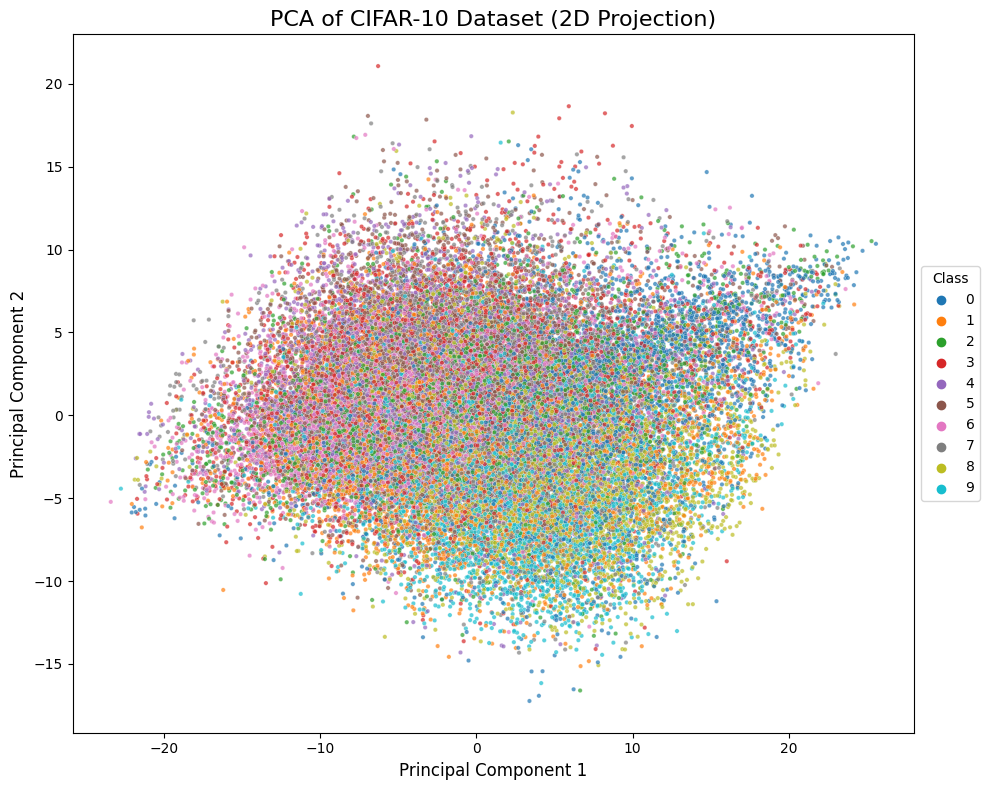

In [ ]:
# Plot 2D projection of PCA
import seaborn as sns

pca_2d = PCA(n_components=2)    # 2 Principal Components
X_train_2d_reduced = pca_2d.fit_transform(X_train_reduced)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train_2d_reduced[:, 0], y=X_train_2d_reduced[:, 1], hue=y_train_1d, palette='tab10', s=10, alpha=0.7)
plt.title("PCA of CIFAR-10 Dataset (2D Projection)", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend(title="Class", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
plt.tight_layout()
plt.show()

Observation: Some variation was captured by the principal components, since there is some structure in the points when projected along the two principal component axis. The points belonging to the same class are close to each other, and the points or images that are very different semantically are further away from each other.

**Model Selection**

**Logistic Regression**

In [ ]:
# Logistic Regression Implementation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)

log_reg.fit(X_train_reduced, y_train_1d)
log_reg_pred = log_reg.predict(X_test_reduced)

# Model Accuracy
accuracy = accuracy_score(y_test_1d, log_reg_pred)
print("The accuracy of Logistic Regression Model after PCA:")
print(f"Accuracy: {accuracy * 100:.2f}%")

The accuracy of Logistic Regression Model after PCA:
Accuracy: 40.51%


**Linear SVC**

In [ ]:
# Linear SVC Implementation
from sklearn.svm import LinearSVC
svc = LinearSVC()

svc.fit(X_train_reduced, y_train_1d)
svc_pred = svc.predict(X_test_reduced)

# Model Accuracy
accuracy = accuracy_score(y_test_1d, svc_pred)
print("The accuracy of Linear SVC Model after PCA:")
print(f"Accuracy: {accuracy * 100:.2f}%")

The accuracy of Linear SVC Model after PCA:
Accuracy: 39.95%


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# One hot-encoding of categorical labels
y_cat_train = to_categorical(y_train, 10)
y_cat_val = to_categorical(y_val, 10)
y_cat_test = to_categorical(y_test, 10)

In [ ]:
# Image Augmentation
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)

In [ ]:
input_dim = (32, 32, 3) # given input image shape
filter_dim = (3, 3) # filter shape
activation = "relu"
padding = "same"

**CNN Model 1**

In [ ]:
# Build a sequential CNN as the baseline model
model1 = Sequential(
    [
        # Convolutional and normalization layers
        Conv2D(filters=32, kernel_size=filter_dim, input_shape=input_dim, activation=activation, padding=padding),
        BatchNormalization(),
        Conv2D(filters=32, kernel_size=filter_dim, input_shape=input_dim, activation=activation, padding=padding),
        BatchNormalization(),

        # Pooling and dropout layer
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),

        # Fully connected layers
        Flatten(),
        Dense(64, activation=activation),
        Dropout(0.25),
        Dense(10, activation='softmax')
    ]

)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Define the metrics for training
metrics = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

In [ ]:
# Compile the baseline model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=metrics)

In [ ]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       524,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,402 (2.04 MB)

 Trainable params: 535,274 (2.04 MB)

 Non-trainable params: 128 (512.00 B)

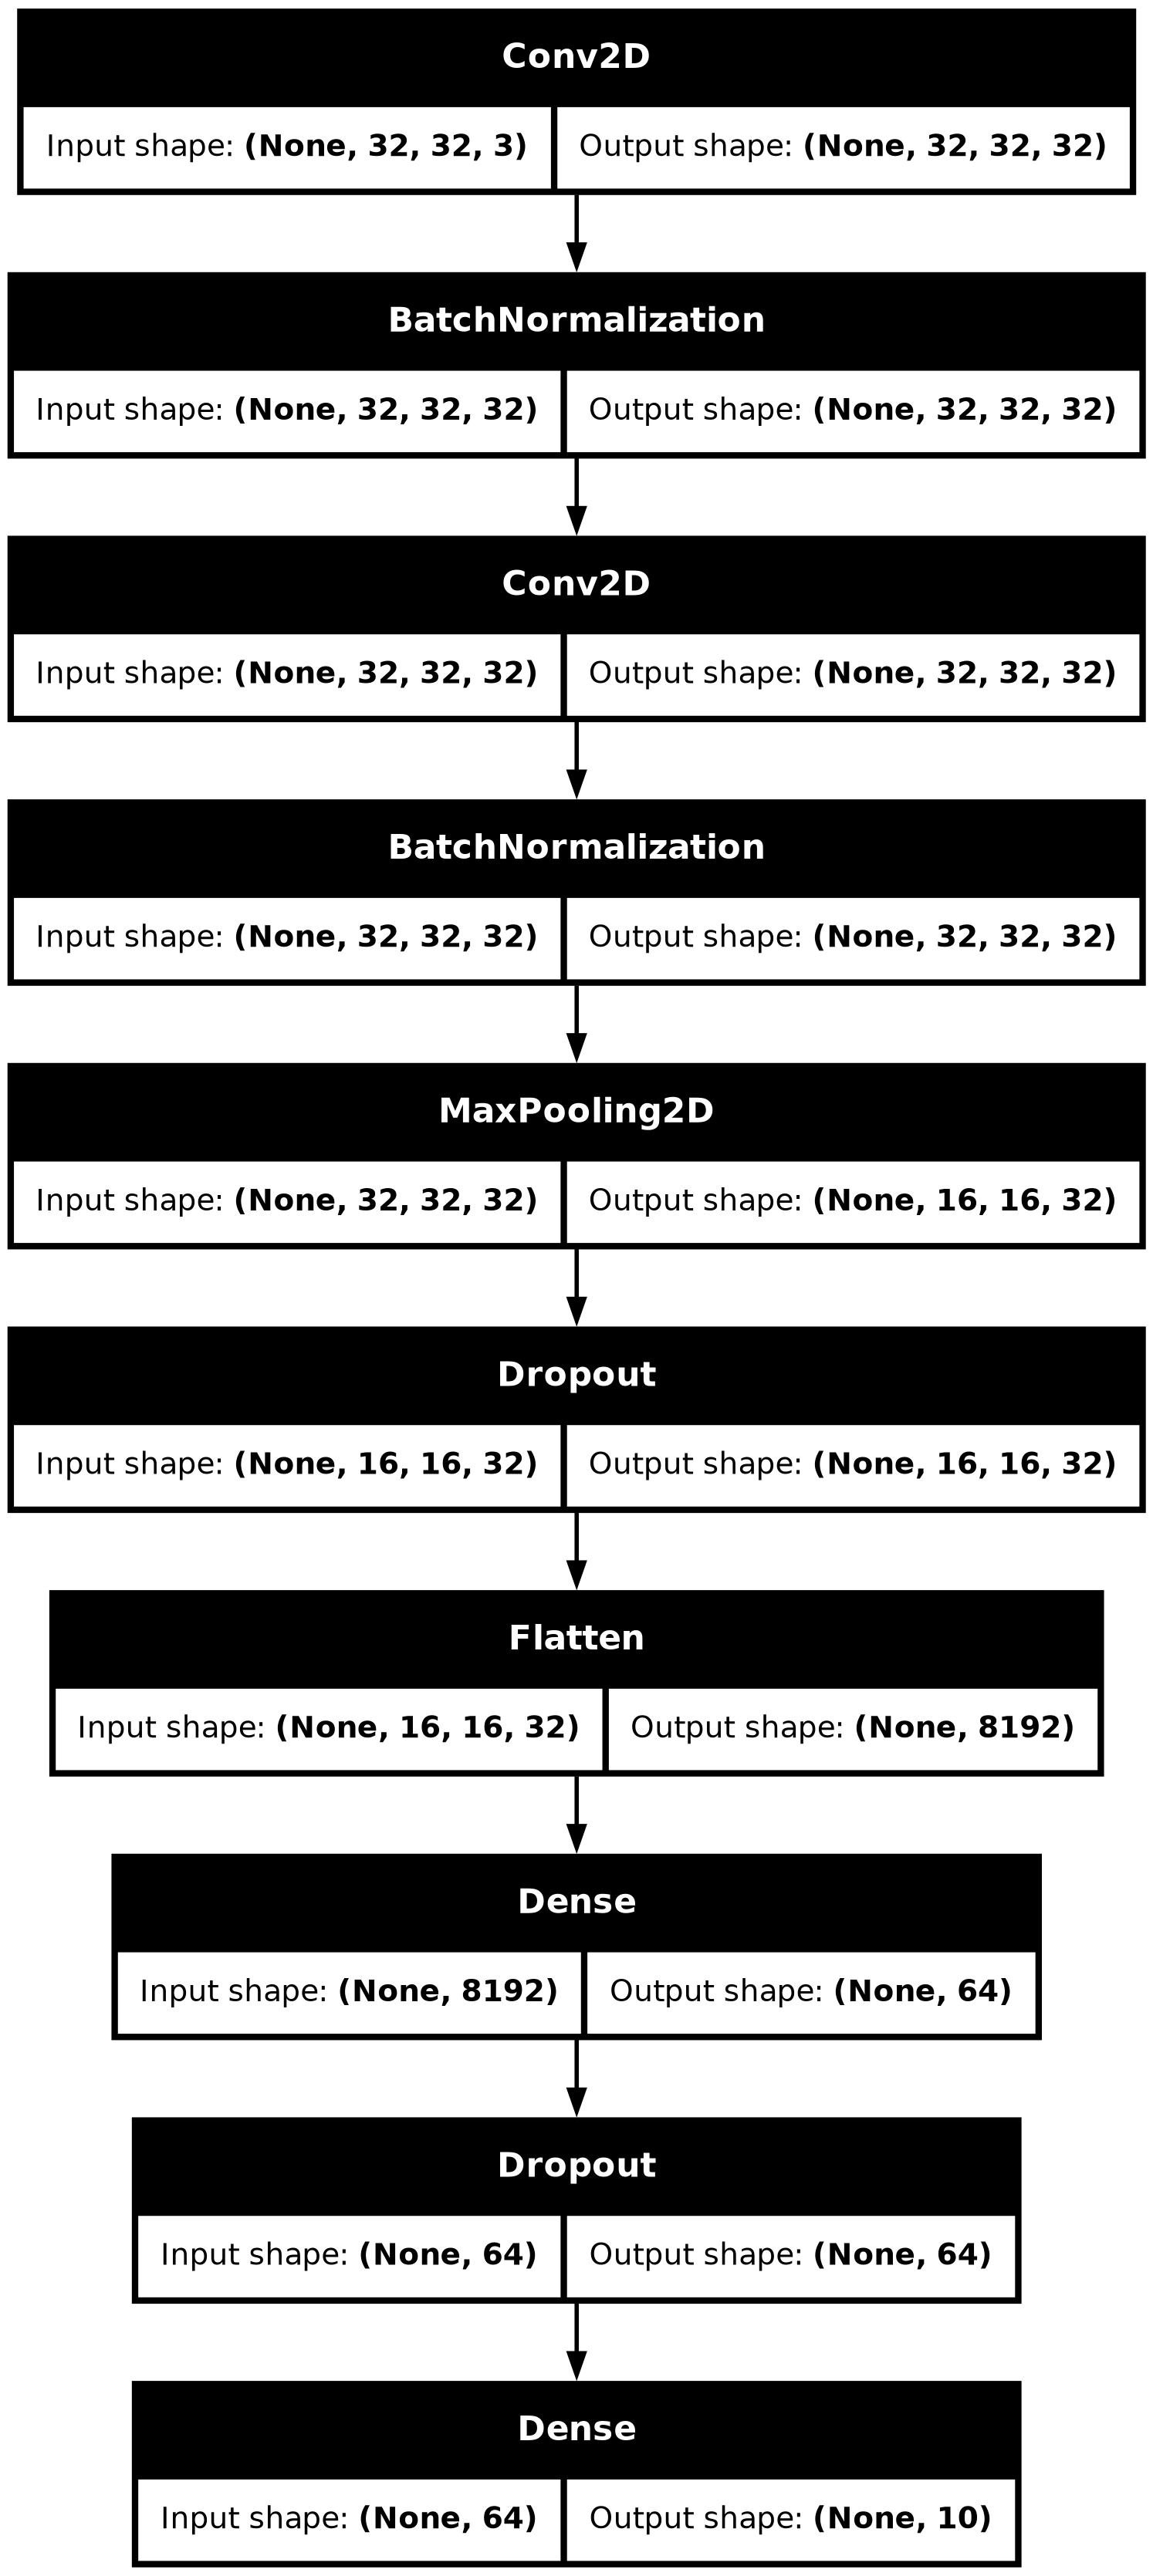

<Figure size 400x320 with 0 Axes>

In [ ]:
# Plot the baseline model architecture
plt.figure(figsize=(5, 4), dpi=80)
tf.keras.utils.plot_model(model1,
                         show_shapes=True)

In [ ]:
# Define the number of steps per epoch
steps_per_epoch = X_train.shape[0] // batch_size

In [ ]:
# Baseline model Training
history1 = model1.fit(train_generator,
              epochs=20,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_val, y_cat_val),
             )

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1732322237.060286      98 service.cc:145] XLA service 0x7dcf88007fd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732322237.060352      98 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  11/1406 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.2033 - loss: 3.3281 - precision: 0.1745 - recall: 0.0874

I0000 00:00:1732322241.864199      98 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1406/1406 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.2803 - loss: 2.0021 - precision: 0.5061 - recall: 0.0724 - val_accuracy: 0.4300 - val_loss: 1.6773 - val_precision: 0.6892 - val_recall: 0.2142
Epoch 2/20
   1/1406 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4375 - loss: 1.6843 - precision: 0.5833 - recall: 0.2188

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1406/1406 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step - accuracy: 0.4375 - loss: 1.6843 - precision: 0.5833 - recall: 0.2188 - val_accuracy: 0.4340 - val_loss: 1.6605 - val_precision: 0.6914 - val_recall: 0.2146
Epoch 3/20
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.4176 - loss: 1.5859 - precision: 0.6553 - recall: 0.2090 - val_accuracy: 0.5396 - val_loss: 1.2772 - val_precision: 0.7495 - val_recall: 0.3052
Epoch 4/20
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 0s 190us/step - accuracy: 0.5000 - loss: 1.4598 - precision: 0.6667 - recall: 0.3125 - val_accuracy: 0.5406 - val_loss: 1.2799 - val_precision: 0.7482 - val_recall: 0.3054
Epoch 5/20
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.4808 - loss: 1.4350 - precision: 0.6850 - recall: 0.2833 - val_accuracy: 0.4710 - val_loss: 1.4807 - val_precision: 0.6834 - val_recall: 0.3030
Epoch 6/20
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 0s 182us/step - accuracy: 0.5000 - loss: 1.4435 - precision: 0.6429 - recall: 0.2812 - val_accuracy: 0.4910 - val

In [ ]:
# Define a function to plot the trends of metrics across epochs
def plot_trend(history):
    plt.figure(figsize=(12, 20))

    plt.subplot(4, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.title('Trend in Loss function')
    plt.legend()

    plt.subplot(4, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.title('Trend in Accuracy')
    plt.legend()

    plt.subplot(4, 2, 3)
    plt.plot(history.history['precision'], label='Training Precision')
    plt.plot(history.history['val_precision'], label='Validation Precision')
    plt.xlabel('Epoch')
    plt.title('Trend in Precision Function')
    plt.legend()

    plt.subplot(4, 2, 4)
    plt.plot(history.history['recall'], label='Training Recall')
    plt.plot(history.history['val_recall'], label='Validation Recall')
    plt.xlabel('Epoch')
    plt.title('Trend in Recall Function')
    plt.legend()

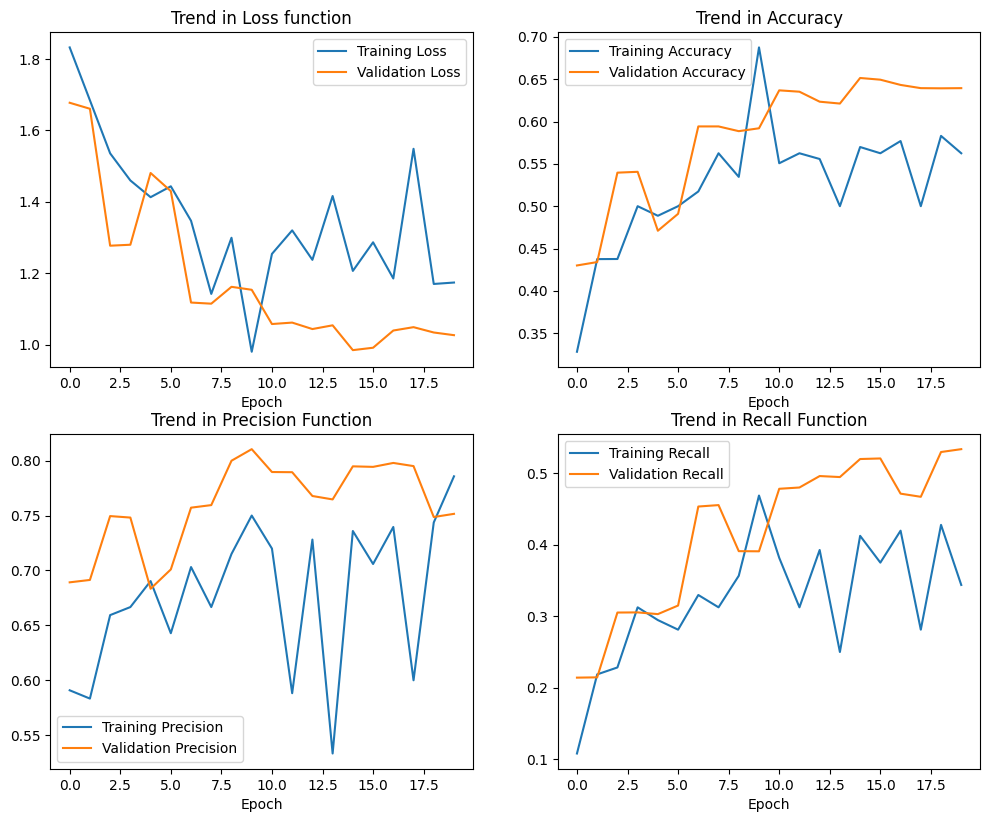

In [ ]:
# Plot trends for baseline model
plot_trend(history1)

In [ ]:
# Baseline model accuracy evaluation on testset
def evaluate(model):
    evaluation = model.evaluate(X_test, y_cat_test)
    print(f'Accuracy on Testset : {evaluation[1] * 100:.2f}%')

evaluate(model1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6418 - loss: 1.0282 - precision: 0.7513 - recall: 0.5306
Accuracy on Testset : 63.94%


In [ ]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    cm = confusion_matrix(y_test, y_pred)

    cm = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=labels)


    fig, ax = plt.subplots(figsize=(10, 10))
    disp = cm.plot(xticks_rotation='vertical', ax=ax)
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


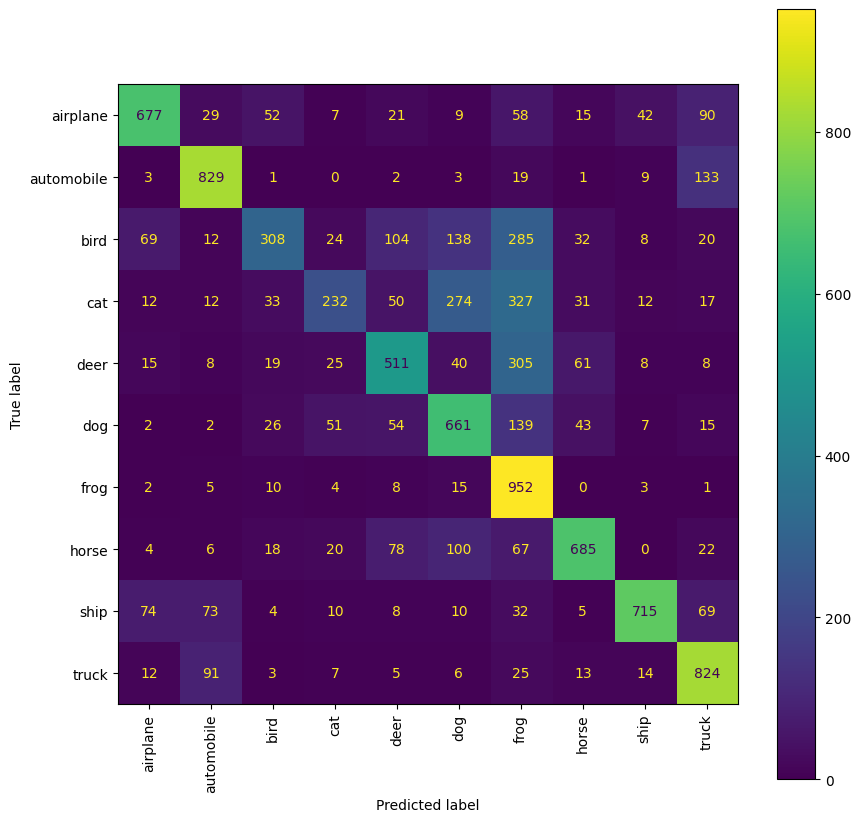

In [ ]:
# Plot confusion matrix for the baseline model
plot_confusion_matrix(model1)

In [ ]:
# Classification report of baseline model
y_pred = model1.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.78      0.68      0.72      1000
           1       0.78      0.83      0.80      1000
           2       0.65      0.31      0.42      1000
           3       0.61      0.23      0.34      1000
           4       0.61      0.51      0.56      1000
           5       0.53      0.66      0.59      1000
           6       0.43      0.95      0.59      1000
           7       0.77      0.69      0.73      1000
           8       0.87      0.71      0.79      1000
           9       0.69      0.82      0.75      1000

    accuracy                           0.64     10000
   macro avg       0.67      0.64      0.63     10000
weighted avg       0.67      0.64      0.63     10000



CNN Model 2

In [ ]:
# Regularize the baseline model
model2 = Sequential(
    [
        # First block of convolutional and normalization layers
        Conv2D(filters=32, kernel_size=filter_dim, input_shape=input_dim, activation=activation, padding=padding),
        BatchNormalization(),
        Conv2D(filters=32, kernel_size=filter_dim, input_shape=input_dim, activation=activation, padding=padding),
        BatchNormalization(),
        # Pooling and dropout layer
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),

        # Second block of convolutional and normalization layers
        Conv2D(filters=64, kernel_size=filter_dim, input_shape=input_dim, activation=activation, padding=padding),
        BatchNormalization(),
        Conv2D(filters=64, kernel_size=filter_dim, input_shape=input_dim, activation=activation, padding=padding),
        BatchNormalization(),
        # Pooling and dropout layer
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),

        # Fully connected layers
        Flatten(),
        Dense(64, activation=activation),
        Dropout(0.25),
        Dense(10, activation='softmax')
    ]

)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


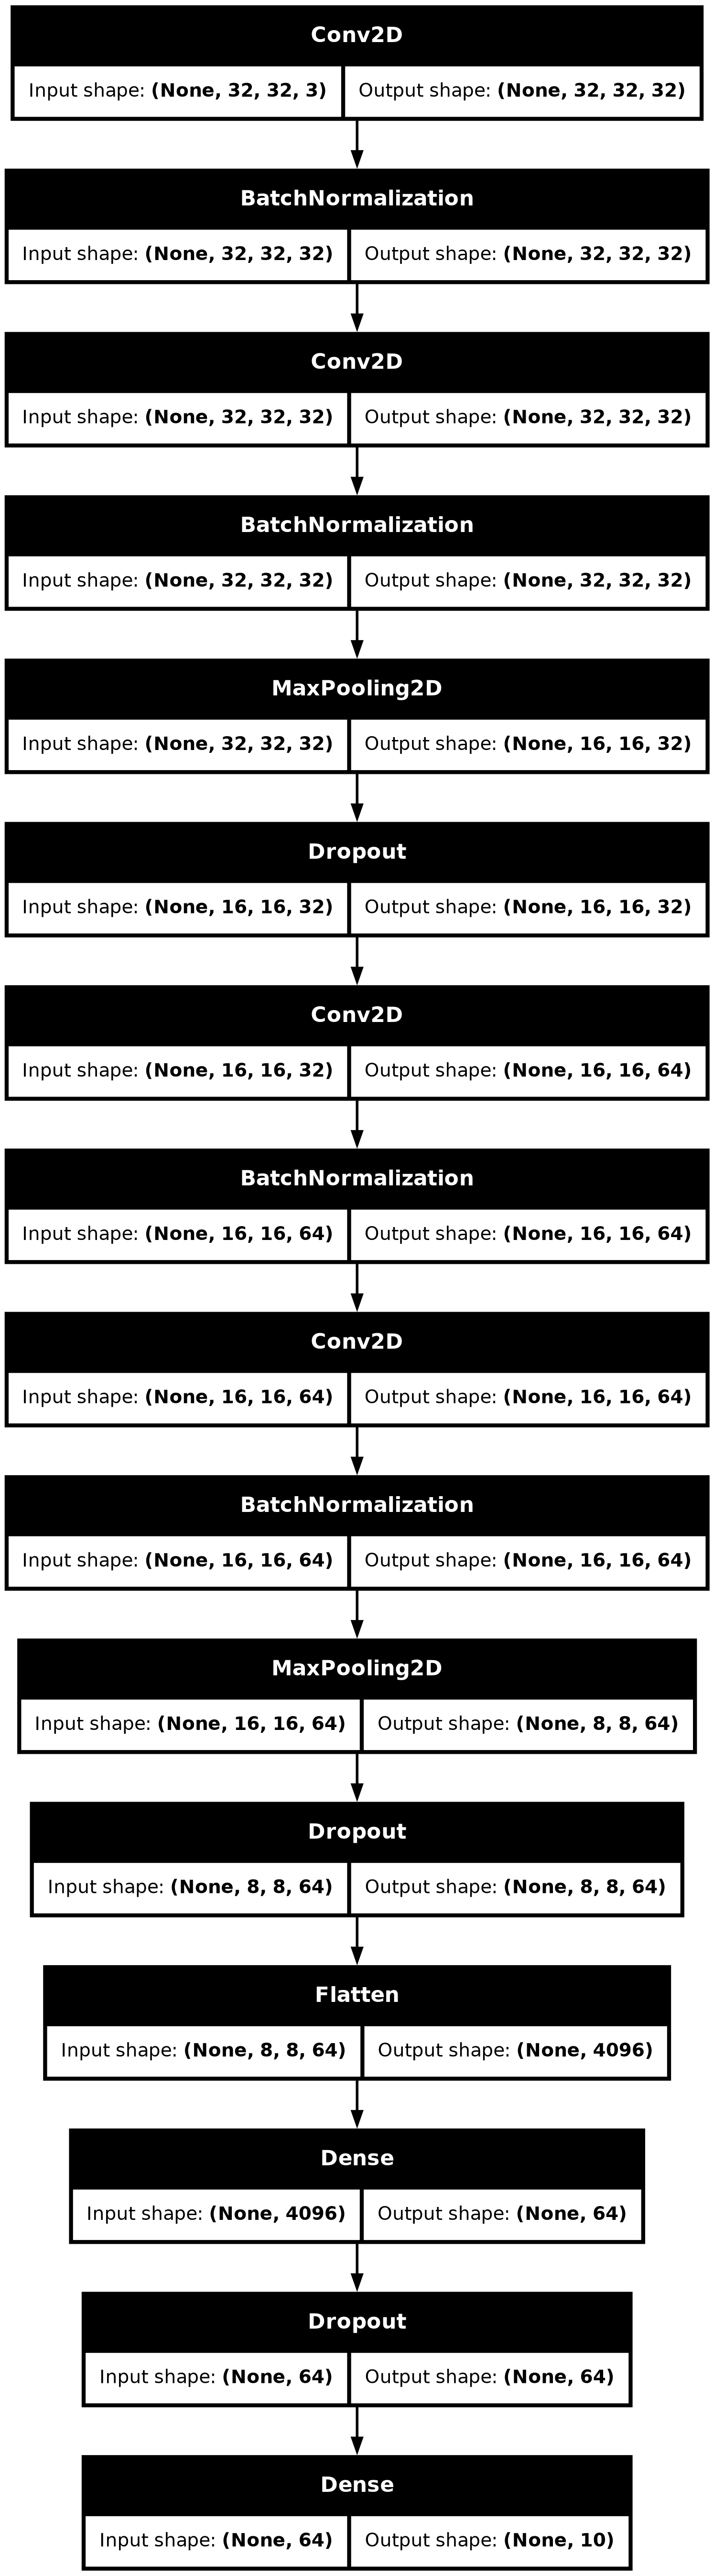

<Figure size 400x320 with 0 Axes>

In [ ]:
# Plot the regularized model architecture
plt.figure(figsize=(5, 4), dpi=80)
tf.keras.utils.plot_model(model2,
                         show_shapes=True)

In [ ]:
# Compile the regularized model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=metrics)

In [ ]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 329,194 (1.26 MB)

 Trainable params: 328,810 (1.25 MB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
# Regularized model Training
history2 = model2.fit(train_generator,
              epochs=20,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_val, y_cat_val),
             )

Epoch 1/20
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 396s 278ms/step - accuracy: 0.2629 - loss: 2.0195 - precision: 0.7133 - recall: 0.2134 - val_accuracy: 0.4662 - val_loss: 1.4305 - val_precision: 0.6911 - val_recall: 0.2542
Epoch 2/20
   1/1406 ━━━━━━━━━━━━━━━━━━━━ 5:43 244ms/step - accuracy: 0.4688 - loss: 1.5314 - precision: 0.7778 - recall: 0.2188

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1406/1406 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4688 - loss: 1.5314 - precision: 0.7778 - recall: 0.2188 - val_accuracy: 0.4612 - val_loss: 1.4472 - val_precision: 0.6917 - val_recall: 0.2562
Epoch 3/20
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 393s 280ms/step - accuracy: 0.4418 - loss: 1.5051 - precision: 0.6736 - recall: 0.2415 - val_accuracy: 0.5360 - val_loss: 1.2594 - val_precision: 0.7085 - val_recall: 0.3690
Epoch 4/20
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4375 - loss: 1.6350 - precision: 0.7500 - recall: 0.2812 - val_accuracy: 0.5366 - val_loss: 1.2646 - val_precision: 0.7071 - val_recall: 0.3650
Epoch 5/20
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 393s 279ms/step - accuracy: 0.5262 - loss: 1.3139 - precision: 0.7218 - recall: 0.3473 - val_accuracy: 0.5888 - val_loss: 1.1504 - val_precision: 0.7419 - val_recall: 0.4370
Epoch 6/20
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5312 - loss: 1.2785 - precision: 0.6111 - recall: 0.3438 - val_accuracy: 0.5862 - val

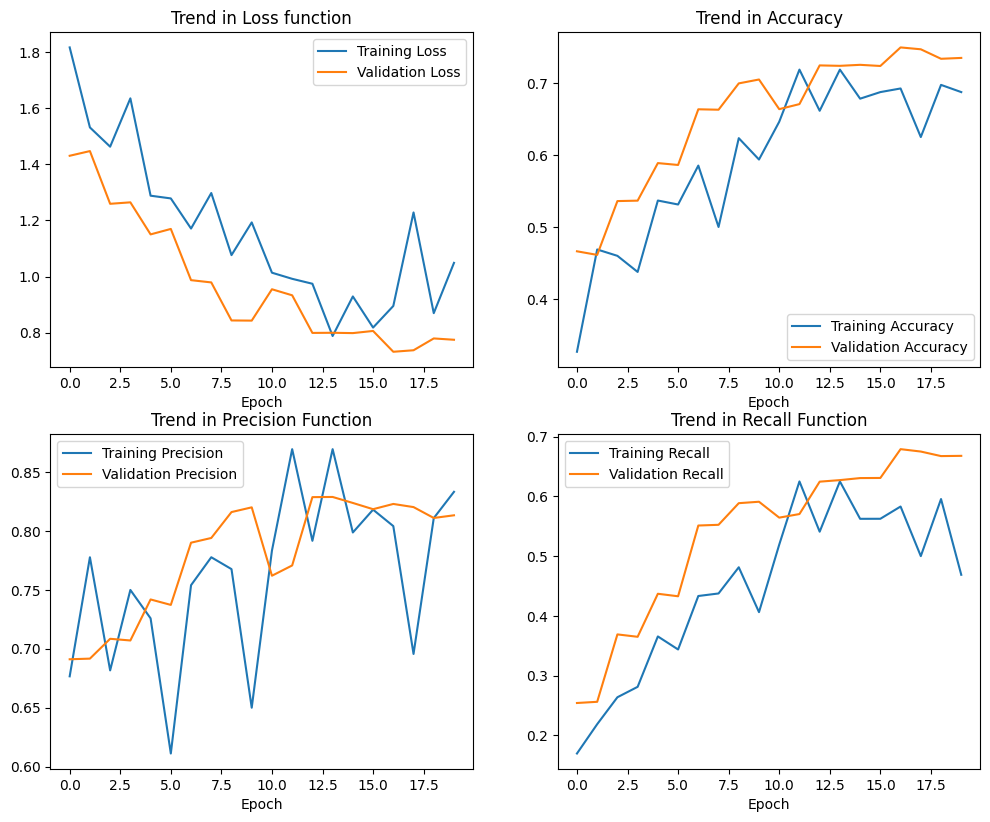

In [ ]:
# Plot trends for regularized model
plot_trend(history2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step


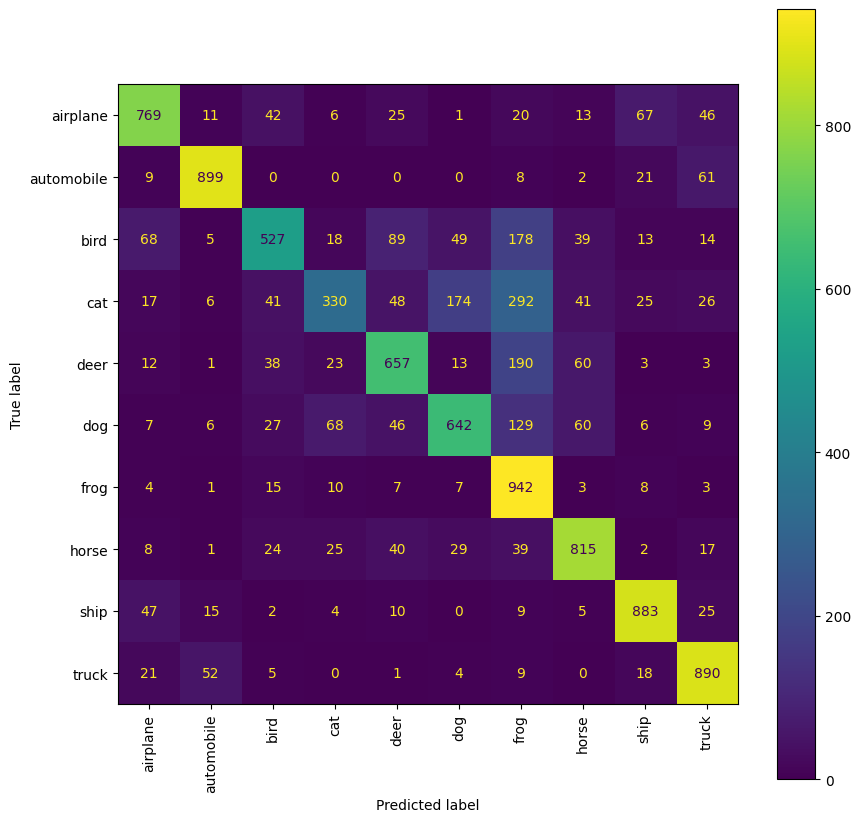

In [ ]:
# Plot confusion matrix for the regularized model
plot_confusion_matrix(model2)

In [ ]:
# Classification report of regularized model
y_pred = model2.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1000
           1       0.90      0.90      0.90      1000
           2       0.73      0.53      0.61      1000
           3       0.68      0.33      0.44      1000
           4       0.71      0.66      0.68      1000
           5       0.70      0.64      0.67      1000
           6       0.52      0.94      0.67      1000
           7       0.79      0.81      0.80      1000
           8       0.84      0.88      0.86      1000
           9       0.81      0.89      0.85      1000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.73     10000
weighted avg       0.75      0.74      0.73     10000



CNN Model 3

In [ ]:
# Finalized sequential model
model3 = Sequential(
    [
        # First block of convolutional and normalization layers
        Conv2D(filters=32, kernel_size=filter_dim, input_shape=input_dim, activation=activation, padding=padding),
        BatchNormalization(),
        Conv2D(filters=32, kernel_size=filter_dim, input_shape=input_dim, activation=activation, padding=padding),
        BatchNormalization(),
        # Pooling and dropout layer
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),

        # Second block of convolutional and normalization layers
        Conv2D(filters=64, kernel_size=filter_dim, input_shape=input_dim, activation=activation, padding=padding),
        BatchNormalization(),
        Conv2D(filters=64, kernel_size=filter_dim, input_shape=input_dim, activation=activation, padding=padding),
        BatchNormalization(),
        # Pooling and dropout layer
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),

        # Third block of convolutional and normalization layers
        Conv2D(filters=128, kernel_size=filter_dim, input_shape=input_dim, activation=activation, padding=padding),
        BatchNormalization(),
        Conv2D(filters=128, kernel_size=filter_dim, input_shape=input_dim, activation=activation, padding=padding),
        BatchNormalization(),
        # Pooling and dropout layer
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),

        # Fully connected layers
        Flatten(),
        Dense(128, activation=activation),
        Dropout(0.25),
        Dense(10, activation='softmax')
    ]

)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


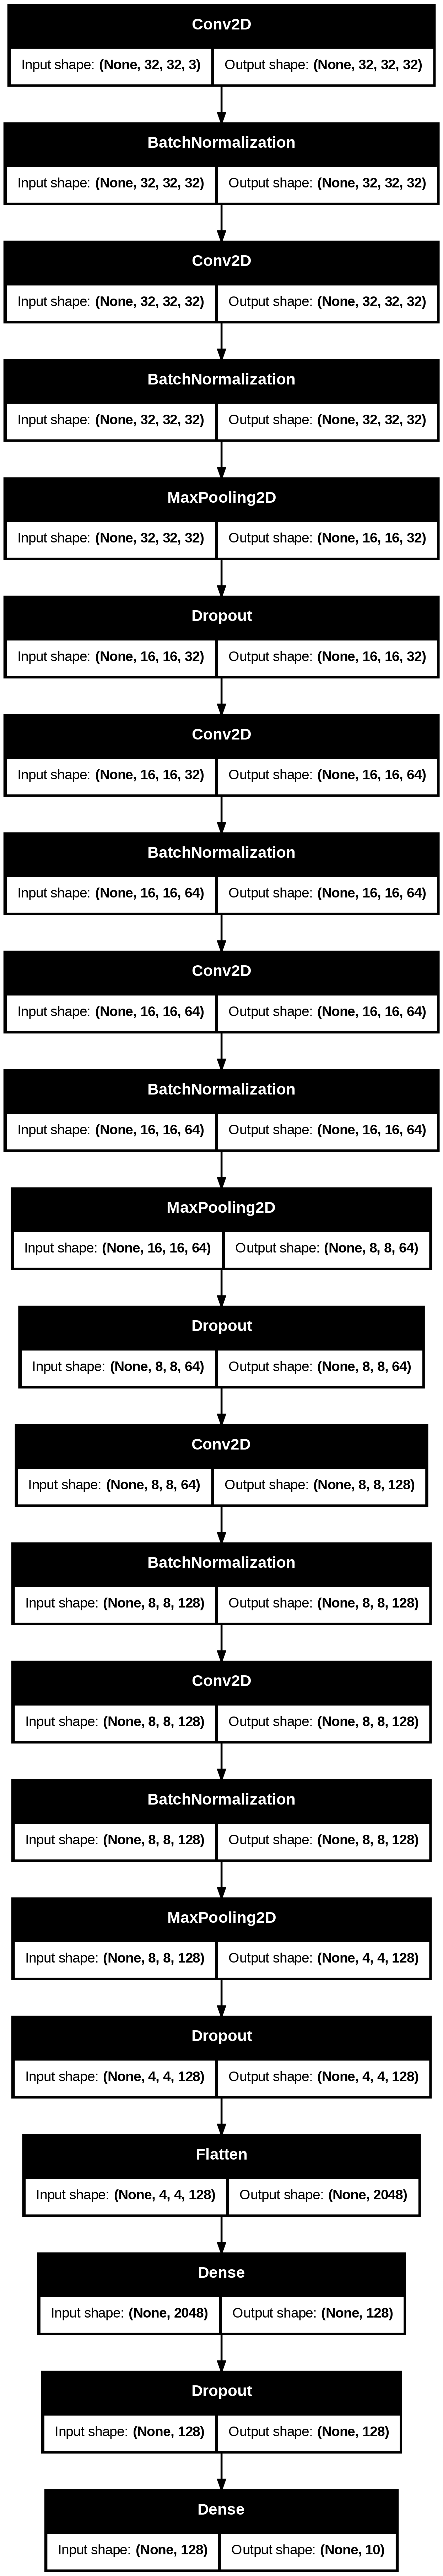

<Figure size 400x320 with 0 Axes>

In [ ]:
# Plot the finalized model architecture
plt.figure(figsize=(5, 4), dpi=80)
tf.keras.utils.plot_model(model3,
                         show_shapes=True)

In [ ]:
# Compile the finalized model
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=metrics)

In [ ]:
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
# Finalized model Training
history3 = model3.fit(train_generator,
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_val, y_cat_val),
             )

Epoch 1/50
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.3144 - loss: 1.9543 - precision: 0.7025 - recall: 0.2607 - val_accuracy: 0.5596 - val_loss: 1.2439 - val_precision: 0.7157 - val_recall: 0.3792
Epoch 2/50
   1/1406 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4375 - loss: 1.3105 - precision: 0.8333 - recall: 0.3125

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1406/1406 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - accuracy: 0.4375 - loss: 1.3105 - precision: 0.8333 - recall: 0.3125 - val_accuracy: 0.5608 - val_loss: 1.2470 - val_precision: 0.7207 - val_recall: 0.3782
Epoch 3/50
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - accuracy: 0.5238 - loss: 1.3399 - precision: 0.6972 - recall: 0.3451 - val_accuracy: 0.5792 - val_loss: 1.1879 - val_precision: 0.7241 - val_recall: 0.4462
Epoch 4/50
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - accuracy: 0.6250 - loss: 1.0842 - precision: 0.8889 - recall: 0.5000 - val_accuracy: 0.5756 - val_loss: 1.1907 - val_precision: 0.7178 - val_recall: 0.4466
Epoch 5/50
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.6032 - loss: 1.1257 - precision: 0.7578 - recall: 0.4595 - val_accuracy: 0.6498 - val_loss: 1.0101 - val_precision: 0.7619 - val_recall: 0.5434
Epoch 6/50
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - accuracy: 0.5938 - loss: 1.1488 - precision: 0.8500 - recall: 0.5312 - val_accuracy: 0.6544 - val

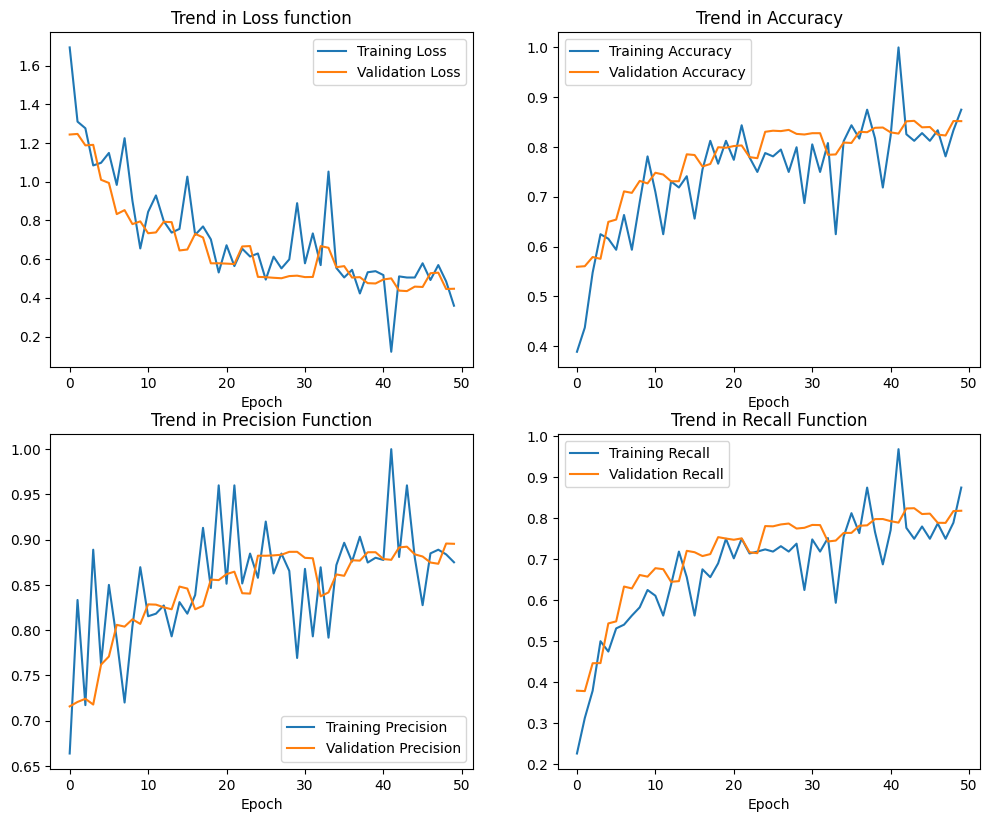

In [ ]:
# Plot trends for finalized model
plot_trend(history3)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


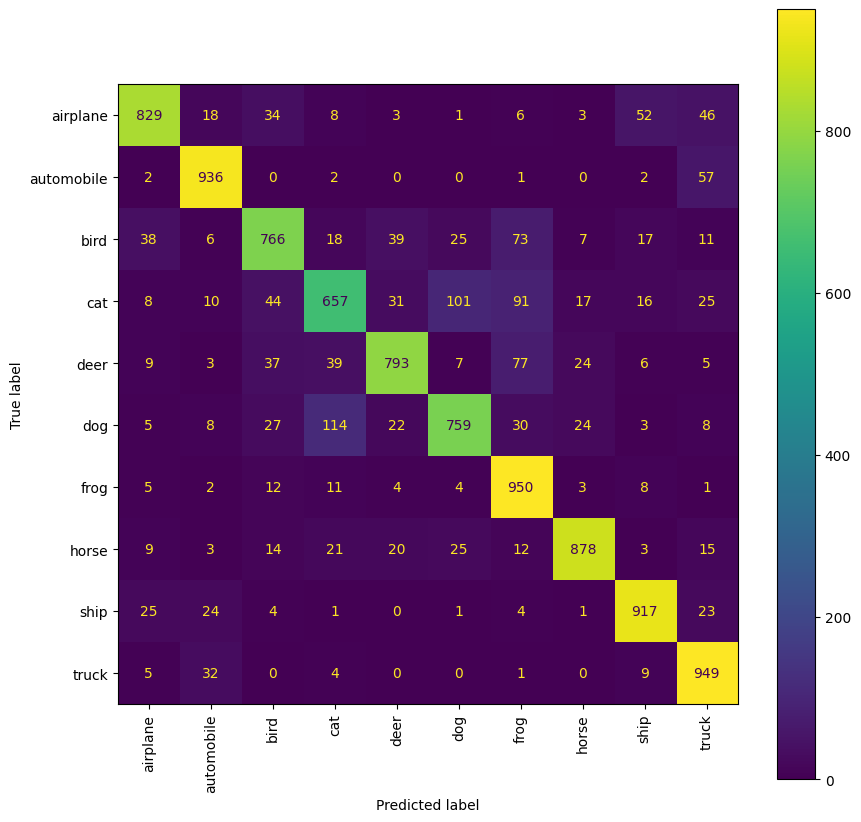

In [ ]:
# Plot confusion matrix for the finalized model
plot_confusion_matrix(model3)

In [ ]:
# Classification report of finalized model
y_pred = model3.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1000
           1       0.90      0.94      0.92      1000
           2       0.82      0.77      0.79      1000
           3       0.75      0.66      0.70      1000
           4       0.87      0.79      0.83      1000
           5       0.82      0.76      0.79      1000
           6       0.76      0.95      0.85      1000
           7       0.92      0.88      0.90      1000
           8       0.89      0.92      0.90      1000
           9       0.83      0.95      0.89      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [ ]:
# Class-specific metrics for finalized model
report_dict = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report_dict).transpose()[:10]
df_report['Class'] = labels

df_report[['Class', 'precision',	'recall',	'f1-score',	'support'	]]

,Class,precision,recall,f1-score,support
0,airplane,0.886631,0.829,0.856848,1000.0
1,automobile,0.898273,0.936,0.916748,1000.0
2,bird,0.816631,0.766,0.790506,1000.0
3,cat,0.750857,0.657,0.700800,1000.0
4,deer,0.869518,0.793,0.829498,1000.0
5,dog,0.822319,0.759,0.789392,1000.0
6,frog,0.763052,0.950,0.846325,1000.0
7,horse,0.917450,0.878,0.897292,1000.0
8,ship,0.887706,0.917,0.902115,1000.0
9,truck,0.832456,0.949,0.886916,1000.0


In [ ]:
# Save the finalized model in a new file
model3.save('cifar_cnn50.h5')

 Image 10 is airplane
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
The model predicts that image 10 is airplane


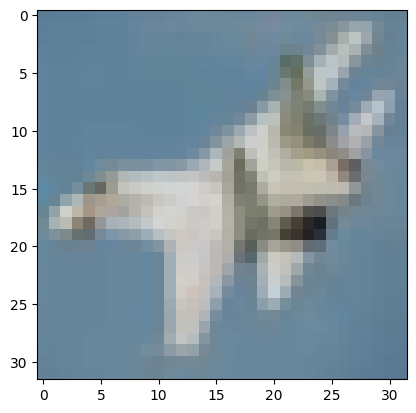

In [ ]:
# Check the predction of the finalized model on a sample image
my_image = X_test[10]
plt.imshow(my_image)

print(f" Image 10 is {labels[y_test[10][0]]}")

pred_10 = np.argmax(model3.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predicts that image 10 is {labels[pred_10]}")